In [2]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks/test_notebooks
/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [3]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

from mymodules import filters
from mymodules.basic_filters import get_lines_hough, equalized_image, image_binary

In [4]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['1_1.tif',
 '1_2.tif',
 '2_1.tif',
 '2_2.tif',
 '3_1.tif',
 '3_2.tif',
 '4_1.tif',
 '4_2.tif',
 '5_1.tif',
 '5_2.tif',
 '6_1.tif',
 '6_2.tif']

Image changed to Blue channel
Name: 5_2.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO
Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048)
Max:  166
Min:  0
Mean:  0.5761640625
Standard Deviation:  5.107244090470523


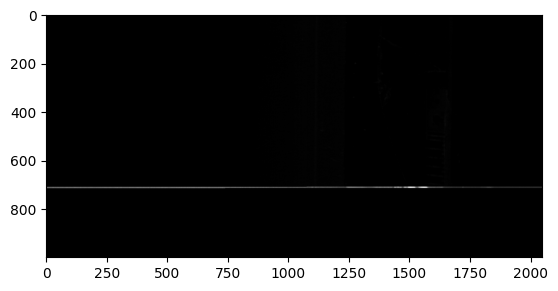

In [5]:
image_number = 9
# image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.basic_array_info()
origin_im.show()

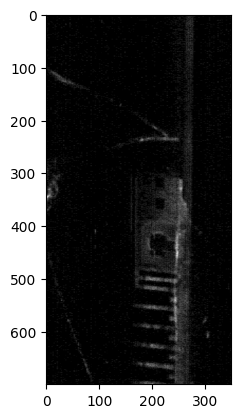

In [6]:
origin_im.crop(1400, 1750, 0, 700) # 9

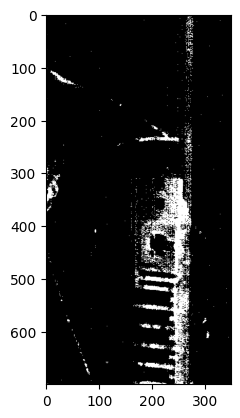

In [7]:
binary_im = origin_im.process(image_binary)

binary_im.show()

In [19]:
import cv2
import numpy as np

def dilate(image: np.ndarray, kernel: np.ndarray = None, iterations: int = 1) -> np.ndarray:
    """膨脹操作 (Dilation)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.dilate(image, kernel, iterations=iterations)

def erode(image: np.ndarray, kernel: np.ndarray = None, iterations: int = 1) -> np.ndarray:
    """侵蝕操作 (Erosion)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.erode(image, kernel, iterations=iterations)

def close(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """閉運算 (Closing)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

def open(image: np.ndarray, kernel: np.ndarray = None) -> np.ndarray:
    """開運算 (Opening)"""
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)  # 默認為 5x5 的正方形內核
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

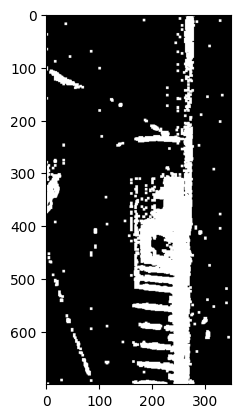

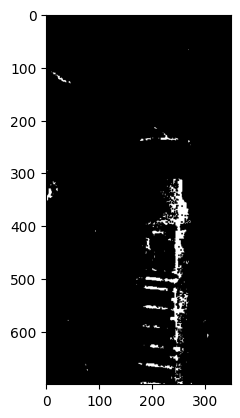

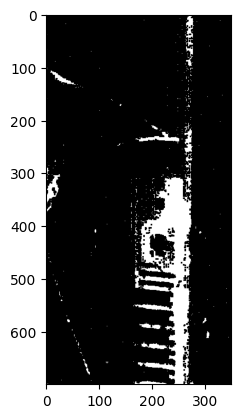

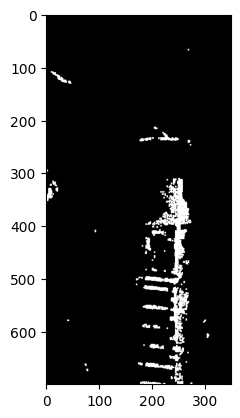

In [32]:
aim_im = origin_im.process(image_binary)

kernel = np.ones((3, 3))

# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(dilate, params={'kernel': kernel, 'iterations': 2})
process_im.show()
process_im = aim_im.process(erode, params={'kernel': kernel, 'iterations': 1})
process_im.show()
process_im = aim_im.process(close, params={'kernel': kernel})
process_im = process_im.process(close, params={'kernel': kernel})
process_im.show()
process_im = aim_im.process(open, params={'kernel': kernel})
process_im.show()


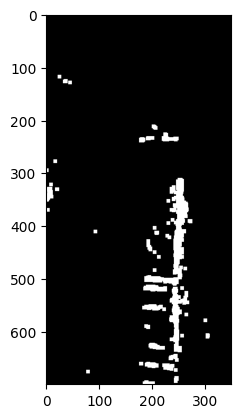

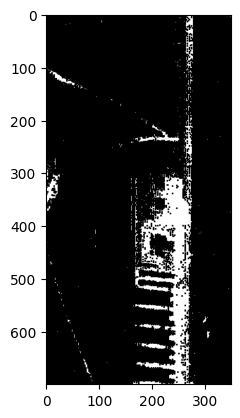

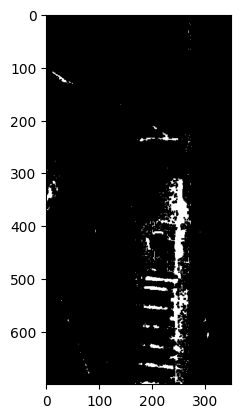

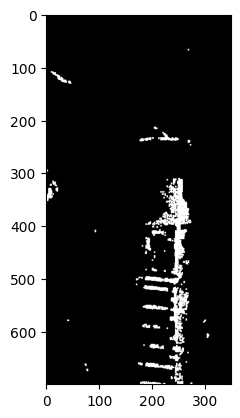

In [26]:
aim_im = origin_im

kernel = np.ones((3, 3))
                 
# 假設 origin_im 和 binary_im 是自定義類別，並且具有 process 方法
process_im = aim_im.process(dilate, params={'kernel': kernel, 'iterations': 3})
process_im = process_im.process(image_binary)
process_im.show()

process_im = aim_im.process(erode, params={'kernel': kernel, 'iterations': 1})
process_im = process_im.process(image_binary)
process_im.show()

process_im = aim_im.process(close, params={'kernel': kernel})
process_im = process_im.process(image_binary)
process_im.show()

process_im = aim_im.process(open, params={'kernel': kernel})
process_im = process_im.process(image_binary)
process_im.show()

In [ ]:
aim_im = origin_im.process(image_binary)

kernel = np.ones((3, 3))

process_im = aim_im.process(close, params={'kernel': kernel})
process_im = process_im.process(close, params={'kernel': kernel})
process_im.show()